In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ip = pd.read_csv("Desktop/neural data/1497 input.csv")

In [3]:
a_column=ip['a']
a_column

c_column=ip['c']

In [4]:
ip.notnull()
#missing values

,a,b,c,d,e,f
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
51151,True,True,True,True,True,True
51152,True,True,True,True,True,True
51153,True,True,True,True,True,True
51154,True,True,True,True,True,True


In [5]:
# TO find Min and Max for all featutres 
# To check wheather normalization in necessary or not
print("a min value",ip['a'].min())
print("a max value",ip['a'].max())
print("b min value",ip['b'].min())
print("b max value",ip['b'].max())
print("c min value",ip['c'].min())
print("c max value",ip['c'].max())
print("d min value",ip['d'].min())
print("d max value",ip['d'].max())
print("e min value",ip['e'].min())
print("e max value",ip['e'].max())
print("f min value",ip['f'].min())
print("f max value",ip['f'].max())


a min value 0.0
a max value 100.8
b min value 0.0
b max value 101.8
c min value 13.2
c max value 269.6
d min value 10.915
d max value 13.232000000000001
e min value 13.21
e max value 46.77
f min value 13.2
f max value 36.2


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


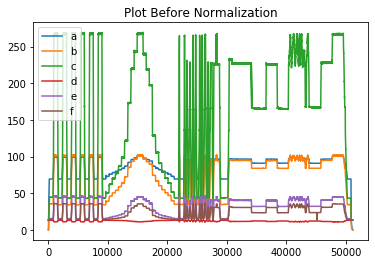

In [6]:




#Graph for all features in same plot
#After plotig features we can clearly say that normalization is necessary !!!!
x=np.arange(0,51156)
y=a_column
plt.title('Plot Before Normalization')
plt.plot(x,ip['a'],label='a')
plt.plot(x,ip['b'],label='b')
plt.plot(x,ip['c'],label='c')
plt.plot(x,ip['d'],label='d')
plt.plot(x,ip['e'],label='e')
plt.plot(x,ip['f'],label='f')
plt.legend()
plt.show()


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(ip))
ip=scaler.transform(ip)
# ip is Normalized data


MinMaxScaler(copy=True, feature_range=(0, 1))


In [8]:
#changing Columns name as before
n_ip= pd.DataFrame(ip)
n_ip.columns=['a','b','c','d','e','f']
n_ip.head(5)

,a,b,c,d,e,f
0,0.0,0.0,0.00000,0.999137,0.000298,0.0
1,0.0,0.0,0.00000,0.998274,0.000298,0.0
2,0.0,0.0,0.00039,0.998274,0.000298,0.0
3,0.0,0.0,0.00000,0.998274,0.000298,0.0
4,0.0,0.0,0.00039,0.999137,0.000298,0.0


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


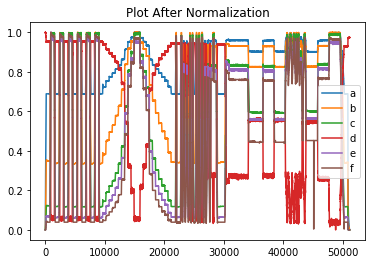

In [9]:
x=np.arange(0,51156)
y=a_column
plt.title('Plot After Normalization')
plt.plot(x,n_ip['a'],label='a')
plt.plot(x,n_ip['b'],label='b')
plt.plot(x,n_ip['c'],label='c')
plt.plot(x,n_ip['d'],label='d')
plt.plot(x,n_ip['e'],label='e')
plt.plot(x,n_ip['f'],label='f')
plt.legend()
plt.show()

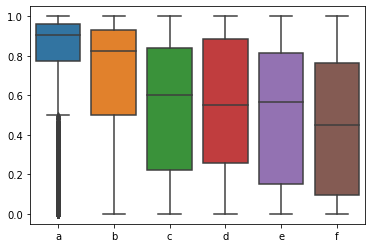

In [10]:
ax=sns.boxplot(data=n_ip)

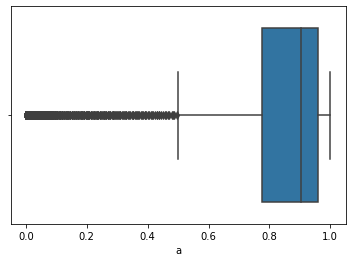

In [11]:
import seaborn as sns
sns.boxplot(n_ip['a'])


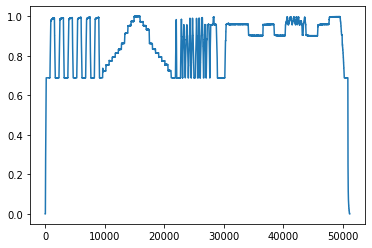

In [12]:
plt.plot(x,n_ip['a'])

In [13]:
from scipy import stats 
z=np.abs(stats.zscore(n_ip['a']))
z
#hear Z is the arrary i.e, row number for n_ip['a'] 
#we should delete the outliers  in the n_ip['a'] based on z array 

array([6.7733997, 6.7733997, 6.7733997, ..., 6.7733997, 6.7733997,
       6.7733997])

In [14]:
print(np.where(z<3))

(array([   93,    94,    95, ..., 50856, 50857, 50858], dtype=int64),)


In [17]:
n_ip['a']=n_ip['a'][(z<3)]


In [18]:
n_ip.notnull()

,a,b,c,d,e,f
0,False,True,True,True,True,True
1,False,True,True,True,True,True
2,False,True,True,True,True,True
3,False,True,True,True,True,True
4,False,True,True,True,True,True
...,...,...,...,...,...,...
51151,False,True,True,True,True,True
51152,False,True,True,True,True,True
51153,False,True,True,True,True,True
51154,False,True,True,True,True,True


In [19]:
n_ip.head(97)

,a,b,c,d,e,f
0,NaN,0.000000,0.000000,0.999137,0.000298,0.000000
1,NaN,0.000000,0.000000,0.998274,0.000298,0.000000
2,NaN,0.000000,0.000390,0.998274,0.000298,0.000000
3,NaN,0.000000,0.000000,0.998274,0.000298,0.000000
4,NaN,0.000000,0.000390,0.999137,0.000298,0.000000
...,...,...,...,...,...,...
92,NaN,0.197446,0.046022,0.986621,0.021156,0.013043
93,0.486111,0.201375,0.047972,0.984894,0.022050,0.013043
94,0.495040,0.207269,0.049532,0.984031,0.023242,0.013043
95,0.500000,0.210216,0.051092,0.984031,0.024136,0.013043


In [20]:
n_ip.fillna(0.51375, inplace=True)

In [21]:
n_ip.notnull()

,a,b,c,d,e,f
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
51151,True,True,True,True,True,True
51152,True,True,True,True,True,True
51153,True,True,True,True,True,True
51154,True,True,True,True,True,True


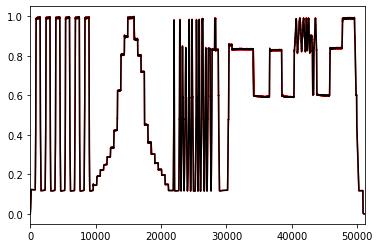

In [27]:
#rolling mean
plt.plot(n_ip['c'],'r-')
smoothing_data=n_ip['c'].rolling(12).mean().plot(style='k')
plt.show()

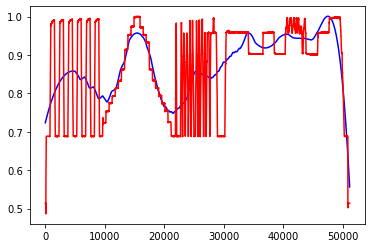

In [56]:
from scipy.signal import savgol_filter
s_filter=savgol_filter(n_ip['a'],wind
                       
                       
                       
                       
                       
                       
                       
                       
                       
                       
                       
                       
                       
                       
                       
                       
                       ow_length=10001,polyorder=3)
plt.plot(s_filter,'b-')
plt.plot(n_ip['a'],'r-')
plt.show()                
